# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** I Kadek Bayu Danu Artha
- **Email:** M298D4KY1727@bangkit.academy
- **ID Dicoding:** danuartha

## Defining the Business Question

- Apakah product dengan nilai review yang baik akan membuat product tersebut lebih sering dibeli oleh pelanggan?

- Bagaimana pola pembelian pelanggan pada 3 wilayah dengan jumlah order terbanyak pada kurun waktu 2 tahun terakhir apakah terdapat peningkatan atau penurunan yang signifikan?

## Import the Necessary Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Dataset Customer

In [70]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load Dataset Geolocation

In [71]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Load Dataset Orders Item

In [72]:
order_item_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Load Dataset Order Payments

In [73]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Load Dataset Order Reviews

In [74]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Load Dataset Orders

In [75]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load Dataset Product Category Name

In [76]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Load Dataset Products

In [77]:
products_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Load Dataset Sellers

In [78]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/Bayu-DanuArtha/Dataset-Bangkit/main/E-Commerce_Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

### Data in Customer Dataset

#### Cheking DataFrame information

In [79]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Cheking Duplicate Data

In [80]:
print("Number of data deduplication: ", customers_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [81]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Data in Geolocation Dataset

#### Cheking DataFrame information

In [82]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Cheking Duplicate Data

In [83]:
print("Number of data deduplication: ", geolocation_df.duplicated().sum())

Number of data deduplication:  261831


#### Cheking Statistical Parameters

In [84]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Data in Order Item Dataset

#### Cheking DataFrame information

In [85]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Cheking Duplicate Data

In [86]:
print("Number of data deduplication: ", order_item_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [87]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Data in Order Payments Dataset

#### Cheking DataFrame information

In [88]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Cheking Duplicate Data

In [89]:
print("Number of data deduplication: ", order_payments_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [90]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Data in Order Reviews Dataset

#### Cheking DataFrame information

In [91]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Cheking Missing Value

In [92]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Cheking Duplicate Data

In [93]:
print("Number of data deduplication: ", order_reviews_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [94]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Data in Orders Dataset

#### Cheking DataFrame information

In [95]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Cheking Missing Value

In [96]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Cheking Duplicate Data

In [97]:
print("Number of data deduplication: ", orders_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [98]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Data in Product Category Dataset

#### Cheking DataFrame information

In [99]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Cheking Duplicate Data

In [100]:
print("Number of data deduplication: ", product_category_df.duplicated().sum())

Number of data deduplication:  0


### Data in Products Dataset

#### Cheking DataFrame information

In [101]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Cheking Missing Value

In [102]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Cheking Duplicate Data

In [103]:
print("Number of data deduplication: ", products_df.duplicated().sum())

Number of data deduplication:  0


#### Cheking Statistical Parameters

In [104]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Data in Sellers Dataset

#### Cheking DataFrame information

In [105]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Cheking Duplicate Data

In [106]:
print("Number of data deduplication: ", sellers_df.duplicated().sum())

Number of data deduplication:  0


## Cleaning Data

### Cleaning Data Geolocation Dataset

#### Remove Duplicate Data

In [107]:
geolocation_df.drop_duplicates(inplace=True)
print("Number of data deduplicaton: ", geolocation_df.duplicated().sum())

Number of data deduplicaton:  0


### Cleaning Data Orders Dataset

#### Handling  Missing Value

In [108]:
order_reviews_df[(order_reviews_df.review_comment_title.isna()) | (order_reviews_df.review_comment_message.isna())]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [109]:
#Because the values of the review_comment_title and reiview_comment_message 
#columns are very random and the more important value is the review_score 
#in the data visualization later so that the two columns will be deleted.

new_order_reviews_df = order_reviews_df.drop(columns=['review_comment_title','review_comment_message'])
new_order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [110]:
new_order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Cleaning Data Product  Dataset

#### Handling Missing Value

In [111]:
products_df[(
    products_df.product_category_name.isna() |
    products_df.product_name_lenght.isna() |
    products_df.product_description_lenght.isna() |
    products_df.product_photos_qty.isna() |
    products_df.product_weight_g.isna() |
    products_df.product_length_cm.isna() |
    products_df.product_height_cm.isna() |
    products_df.product_width_cm.isna())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [112]:
products_df_clean = products_df.dropna()
products_df_clean.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Exploration Customer Dataset

#### Read the names of cities and the number of customers from those cities

In [113]:
city_counts = customers_df['customer_city'].value_counts()
print("Number of people from each city:")
print(city_counts)

Number of people from each city:
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64


#### View customer distribution based on state

In [114]:
state_counts = customers_df['customer_state'].value_counts()
print("Number of people from each state:")
print(state_counts)

Number of people from each state:
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64


### Exploration Geolocation Dataset

#### View the distribution of locations in each city

In [115]:
location_counts = geolocation_df['geolocation_city'].value_counts()
print("Number of location from each city:")
print(location_counts)

Number of location from each city:
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: geolocation_city, Length: 8011, dtype: int64


### Exploration Order Payments Dataset

#### Seeing how many people are paying in installments and how many more payments there are

In [116]:
installments_counts = order_payments_df['payment_installments'].value_counts()
print("Number of people making installments based on the number of installment payments:")
print(installments_counts)

Number of people making installments based on the number of installment payments:
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64


### Exploration Orders Dataset

#### Create a delivery time field

In [117]:
# Convert column value from str to datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Calculating the time difference
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]

# Convert time difference value into days
delivery_time_seconds = delivery_time.dt.total_seconds()
orders_df["delivery_time"] = round(delivery_time_seconds / 86400)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0


#### Cheking Statistical Parameters

In [118]:
orders_df.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,90733,81018,NaN,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2018-02-27 04:31:10,2018-05-09 15:48:00,NaN,2017-12-20 00:00:00,NaN
freq,1,1,96478,NaN,9,47,NaN,522,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,2018-01-14 12:09:19.035542272,NaN,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,2016-10-11 13:46:32,NaN,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,2017-09-25 22:07:22.249999872,NaN,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,2018-02-02 19:28:10.500000,NaN,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,2018-05-15 22:48:52.249999872,NaN,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,2018-10-17 13:22:46,NaN,210.000000


### Exploration Product Category Dataset

#### View the number of products by category

In [119]:
product_category_counts = products_df['product_category_name'].value_counts()
print("Number of products by category:")
print(product_category_counts)

Number of products by category:
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64


### Exploratioan Seller Dataset

#### View the number of sellers in each city

In [120]:
city_seller_counts = sellers_df['seller_city'].value_counts()
print("Number of sellers by city:")
print(city_seller_counts)

Number of sellers by city:
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64


#### View the number of sellers in each state

In [121]:
state_seller_counts = sellers_df['seller_state'].value_counts()
print("Number of sellers by state:")
print(state_seller_counts)

Number of sellers by state:
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64


### Merge Dataset

#### Merging Customer and Order Dataset

In [122]:
customer_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  object        
 9   order_delivered_carrier_date   97658 non-null  object        
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

#### Merging Product and Order Dataset

In [123]:
products_order_df = pd.merge(
    left=products_df_clean,
    right=order_item_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  object        
 9   order_delivered_carrier_date   97658 non-null  object        
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

#### Merging Product Order and Order Review Dataset

In [124]:
products_order_review_df = pd.merge(
    left=products_order_df,
    right=new_order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
products_order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111701 entries, 0 to 111700
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  111701 non-null  object 
 1   product_category_name       111701 non-null  object 
 2   product_name_lenght         111701 non-null  float64
 3   product_description_lenght  111701 non-null  float64
 4   product_photos_qty          111701 non-null  float64
 5   product_weight_g            111701 non-null  float64
 6   product_length_cm           111701 non-null  float64
 7   product_height_cm           111701 non-null  float64
 8   product_width_cm            111701 non-null  float64
 9   order_id                    111701 non-null  object 
 10  order_item_id               111701 non-null  int64  
 11  seller_id                   111701 non-null  object 
 12  shipping_limit_date         111701 non-null  object 
 13  price         

#### Merging All Dataset

In [125]:
all_data_df = pd.merge(
    left=products_order_review_df,
    right=customer_order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111701 entries, 0 to 111700
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     111701 non-null  object        
 1   product_category_name          111701 non-null  object        
 2   product_name_lenght            111701 non-null  float64       
 3   product_description_lenght     111701 non-null  float64       
 4   product_photos_qty             111701 non-null  float64       
 5   product_weight_g               111701 non-null  float64       
 6   product_length_cm              111701 non-null  float64       
 7   product_height_cm              111701 non-null  float64       
 8   product_width_cm               111701 non-null  float64       
 9   order_id                       111701 non-null  object        
 10  order_item_id                  111701 non-null  int64         
 11  

#### Exploration Data After Merge

##### Counts each review range in each product category

In [126]:
score_counts_by_category = all_data_df.groupby(['product_category_name', 'review_score']).size()
result_df = score_counts_by_category.unstack(fill_value=0)

result_df.head()

review_score,1.0,2.0,3.0,4.0,5.0
product_category_name,,,,,
agro_industria_e_comercio,27,7,13,57,108
alimentos,51,13,26,92,313
alimentos_bebidas,17,5,29,50,178
artes,31,7,18,39,112
artes_e_artesanato,3,0,3,3,15


##### Find the lowest, average and highest price of each product category

In [127]:
price_stats_by_category = all_data_df.groupby('product_category_name')['price'].agg(['min', 'mean', 'max'])

price_stats_by_category.head()

,min,mean,max
product_category_name,,,
agro_industria_e_comercio,12.99,342.124858,2990.00
alimentos,9.99,57.634137,274.99
alimentos_bebidas,6.50,54.537393,699.90
artes,3.50,115.802105,6499.00
artes_e_artesanato,9.80,75.583750,289.49


##### View the number of orders each day

In [128]:
daily_order_count = all_data_df.groupby(all_data_df['order_purchase_timestamp'].dt.date).size()

print(daily_order_count)

order_purchase_timestamp
2016-09-04     2
2016-09-05     1
2016-09-15     3
2016-10-02     1
2016-10-03     8
              ..
2018-08-26    81
2018-08-27    70
2018-08-28    45
2018-08-29    16
2018-09-03     1
Length: 616, dtype: int64


##### View the delivery time in each review score range

In [129]:
delivery_time_stats_by_review_score = all_data_df.groupby('review_score')['delivery_time'].agg(['min', 'mean', 'max'])

delivery_time_stats_by_review_score.head()

,min,mean,max
review_score,,,
1.0,1.0,19.577045,196.0
2.0,1.0,15.662915,208.0
3.0,1.0,14.006122,188.0
4.0,1.0,12.174679,195.0
5.0,1.0,10.613742,187.0


##### View the average review score each day

In [130]:
daily_review_score_mean = all_data_df.groupby(all_data_df['order_purchase_timestamp'].dt.date)['review_score'].mean()

print(daily_review_score_mean)

order_purchase_timestamp
2016-09-04    1.000000
2016-09-05    1.000000
2016-09-15    1.000000
2016-10-02    1.000000
2016-10-03    3.000000
                ...   
2018-08-26    4.320988
2018-08-27    4.347826
2018-08-28    4.466667
2018-08-29    4.375000
2018-09-03    1.000000
Name: review_score, Length: 616, dtype: float64


##### View the largest total purchases by stat

In [131]:
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,40811,5161564.58
RJ,12571,1807748.25
MG,11378,1573254.22
RS,5352,743901.63
PR,4928,677414.28
SC,3554,514856.56
BA,3315,506475.95
DF,2094,301956.36
GO,1960,288737.73


##### View the average review score by state

In [144]:
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)

,order_id,review_score
customer_state,,
AP,68,4.222222
SP,40811,4.130311
TO,275,4.113269
PR,4928,4.104472
AM,146,4.086420
MG,11378,4.086086
AC,79,4.077778
RN,476,4.076775
RS,5352,4.059864


In [133]:
all_data_df.to_csv("all_data.csv", index=False)

### Visualization & Explanatory Analysis

#### Effect of review value on the number of product purchases

Create data on the number of orders and average review scores for each product category

In [145]:
summary_df = all_data_df.groupby('product_category_name').agg({
    'order_id': 'count', 
    'review_score': 'mean'  
})

summary_df.columns = ['Number of Order', 'Review Score']
summary_df = summary_df.sort_values(by='Number of Order', ascending=False)

print(summary_df)

                               Number of Order  Review Score
product_category_name                                       
cama_mesa_banho                          11270      3.895663
beleza_saude                              9727      4.142768
esporte_lazer                             8700      4.107986
moveis_decoracao                          8415      3.903493
informatica_acessorios                    7894      3.930819
...                                        ...           ...
cds_dvds_musicais                           14      4.642857
la_cuisine                                  14      4.000000
pc_gamer                                     9      3.333333
fashion_roupa_infanto_juvenil                8      4.500000
seguros_e_servicos                           2      2.500000

[73 rows x 2 columns]


Visualization of the number of orders for top 30 product category

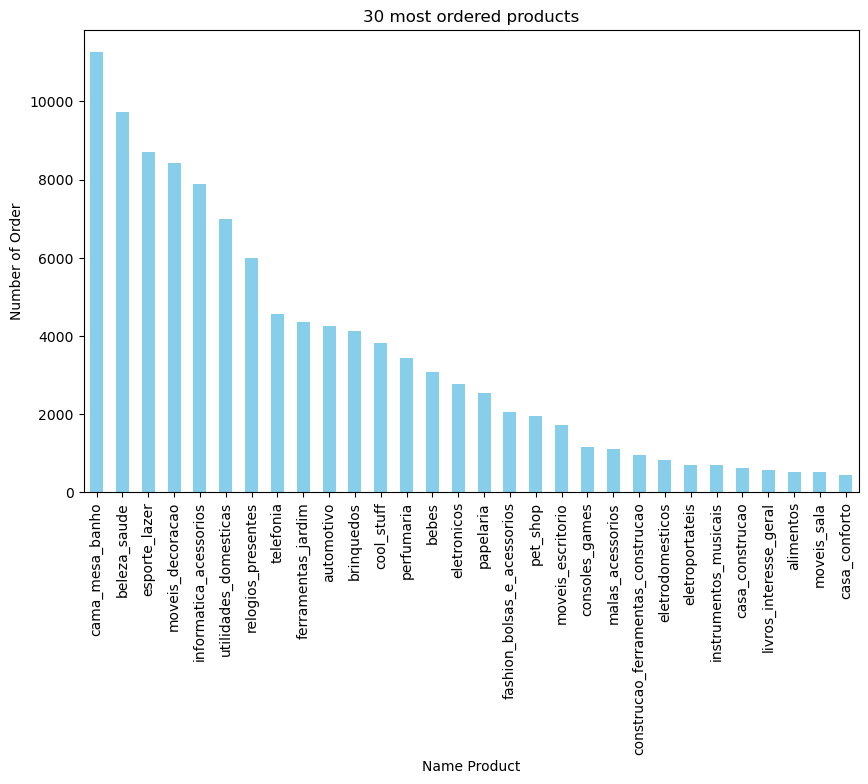

In [183]:
top_30_summary_df = summary_df.head(30)

plt.figure(figsize=(10, 6))
top_30_summary_df['Number of Order'].plot(kind='bar', color='skyblue')
plt.title('30 most ordered products')
plt.xlabel('Name Product')
plt.ylabel('Number of Order')
plt.xticks(rotation=90)
plt.show()

Visualization of the average review score of top 30 category products

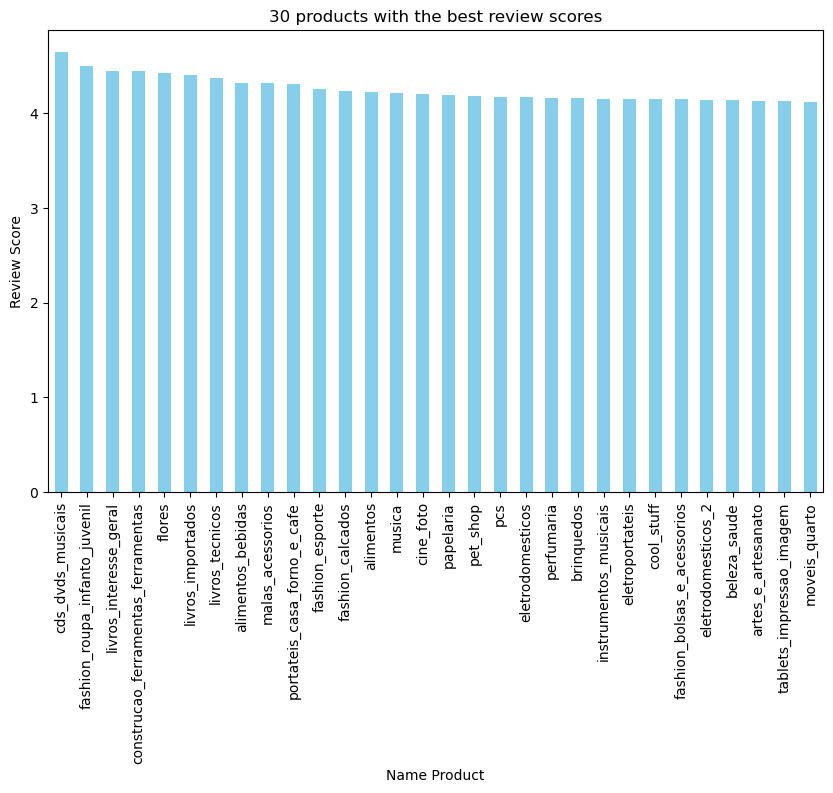

In [184]:
review_df = summary_df.sort_values(by='Review Score', ascending=False)
top_30_review_df = review_df.head(30)

plt.figure(figsize=(10, 6))
top_30_review_df['Review Score'].plot(kind='bar', color='skyblue')
plt.title('30 products with the best review scores')
plt.xlabel('Name Product')
plt.ylabel('Review Score')
plt.xticks(rotation=90)
plt.show()

#### View the pattern of the number of orders in the top 3 states

View the order pattern in the state with the most orders

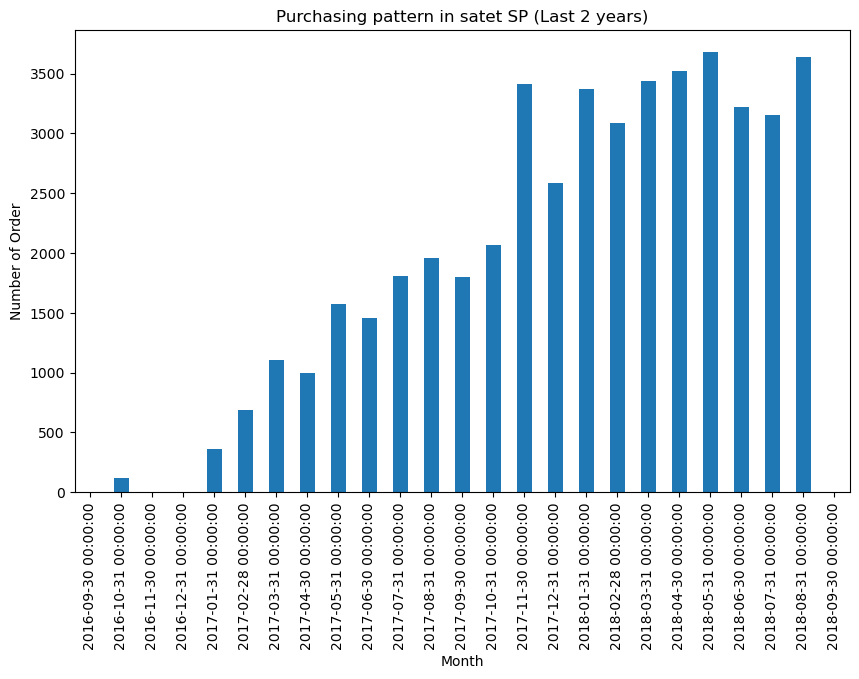

In [185]:

top_state = all_data_df['customer_state'].value_counts().idxmax()
df_top_state = all_data_df[all_data_df['customer_state'] == top_state]

end_date = pd.to_datetime(df_top_state['order_purchase_timestamp']).max()
start_date = end_date - pd.DateOffset(years=2)
df_top_state_last_year = df_top_state[(df_top_state['order_purchase_timestamp'] >= start_date) & (df_top_state['order_purchase_timestamp'] <= end_date)]

monthly_orders = df_top_state_last_year.resample('M', on='order_purchase_timestamp')['order_id'].count()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar')
plt.title(f'Purchasing pattern in satet {top_state} (Last 2 years)')
plt.xlabel('Month')
plt.ylabel('Number of Order')
plt.xticks(rotation=90)
plt.show()

View the order pattern of the state with the second most orders

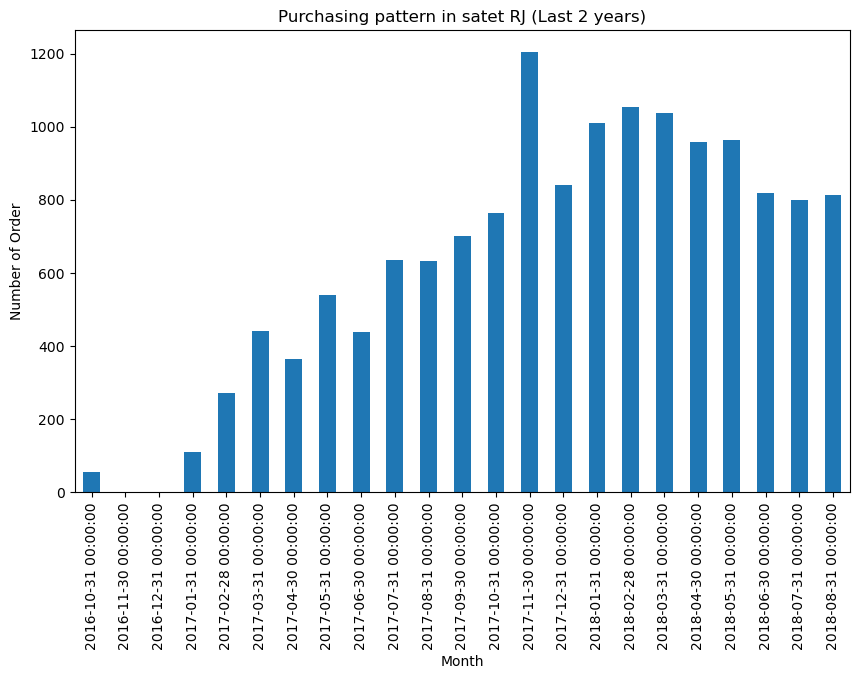

In [186]:
second_state = all_data_df['customer_state'].value_counts().index[1]

# Filter data untuk negara bagian dengan urutan kedua
df_second_state = all_data_df[all_data_df['customer_state'] == second_state]

# Ambil data untuk kurun waktu satu tahun terakhir
end_date = pd.to_datetime(df_second_state['order_purchase_timestamp']).max()
start_date = end_date - pd.DateOffset(years=2)
df_second_state_last_year = df_second_state[(df_second_state['order_purchase_timestamp'] >= start_date) & (df_second_state['order_purchase_timestamp'] <= end_date)]

# Hitung jumlah order untuk setiap bulan dalam kurun waktu tersebut
monthly_orders = df_second_state_last_year.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).size()

# Visualisasikan pola pembelian untuk negara bagian dengan urutan kedua
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar')
plt.title(f'Purchasing pattern in satet {second_state} (Last 2 years)')
plt.xlabel('Month')
plt.ylabel('Number of Order')
plt.xticks(rotation=90)
plt.show()

View the order pattern of the state with the third most orders

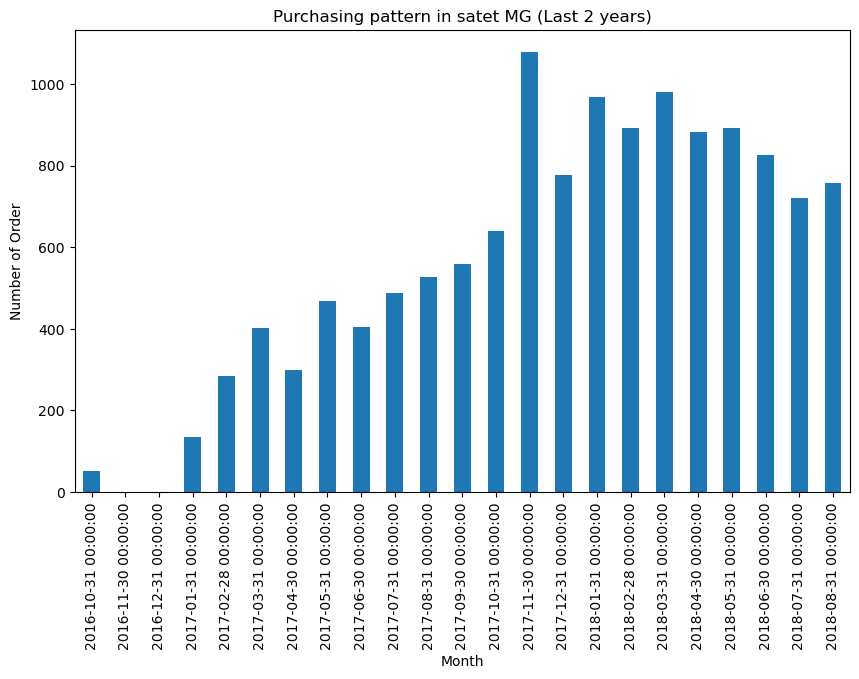

In [187]:
third_state = all_data_df['customer_state'].value_counts().index[2]
df_third_state = all_data_df[all_data_df['customer_state'] == third_state]

end_date = pd.to_datetime(df_third_state['order_purchase_timestamp']).max()
start_date = end_date - pd.DateOffset(years=2)
df_third_state_last_year = df_third_state[(df_third_state['order_purchase_timestamp'] >= start_date) & (df_third_state['order_purchase_timestamp'] <= end_date)]

monthly_orders2 = df_third_state_last_year.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).size()

plt.figure(figsize=(10, 6))
monthly_orders2.plot(kind='bar')
plt.title(f'Purchasing pattern in satet {third_state} (Last 2 years)')
plt.xlabel('Month')
plt.ylabel('Number of Order')
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Pada explorasi dan visualisasi yang telah dilakukan ternyata tidak ada begitu keterikatan yang kuat antara rata-rata review score oleh customer terhadap banyaknya produk tersebut dibeli. Hal ini dapat dilihat product dengan jumlah pembelian terbanyak mendapat nilai review sebesar 3,895 dan 5 product yang dengan pembelian terbanyak tidak masuk kedalam 30 top product dengan rating terbaik. Selain itu product dengan rating terbaik juga hanya di beli sebanyak 14 kali saja. Meskipun dalah rating setiap product yang memiliki pembelian terbanyak masih memiliki nilai yang tergolong baik.

- Berdasarkan visualisasi yang telah ditampilkan pada ketiga state pada bagian awal rentang waktu masih terdapat sedikit order hal ini bisa saja terjadi karena masih barunya E-Commerce terbentuk atau masuk kedalam state tersebut namun semakin menuju ke dalam rentang pertengahan waktu terlihat adanya peningkatan yang baik meskipun masih adanya penurunan sedikit pada beberapa bulan namun tidak begitu signifikan. Pada produk yang paling laku dijual peningkatannya masih tetap baik setelah bulan November (11) 2017 sedangkan pada produk terlaris kedua dan ketiga nampak perlahan mengalami penuruan meskipun tidak terlalu signifikan sekali tiap bulan-bulan berikutnya.